In [366]:
import seaborn as sns
import pandas as pd
import glob
import os
from pylab import savefig

# This is a commnet. The line the follows allows for inline plotting. i.e. your plots will show up in these boxes.
%matplotlib inline

from IPython.display import Image

In [13]:
path = '/Users/ara/Documents/bat_metagenomes/centrifuge_CAVE/'   

In [14]:
my_dir = path
filelist = []
filesList = []
os.chdir( my_dir )

### NOTE
All my output files from centrifuge are called something like foo_1_centrifuge_report.tsv. The next chunk of code expects the end of the file name to be: centrifuge_report.tsv . 

In [84]:
for files in glob.glob("*centrifuge_report.tsv"):
    #fileName, fileExtension = os.path.splitext(files)
    filelist.append(filesList) #filename without extension
    filesList.append(files) #filename with extension

This loops through each file and reads them into a pandas dataframe. 

In [85]:
df = pd.DataFrame()
for ijk in filesList:
    frame = pd.read_csv(ijk,sep='\t', engine='python',header=0)
    frame['sample_id']=ijk
    df = df.append(frame) 

In [86]:
df.head(5)

,name,taxID,taxRank,genomeSize,numReads,numUniqueReads,abundance,sample_id
0,Azorhizobium caulinodans,7,species,5369772,6,3,0.0,CC140620_1_centrifuge_report.tsv
1,Buchnera aphidicola,9,species,621119,71,59,0.0,CC140620_1_centrifuge_report.tsv
2,Cellulomonas gilvus,11,species,3526441,12,4,0.0,CC140620_1_centrifuge_report.tsv
3,Dictyoglomus thermophilum,14,species,1959987,7,7,0.0,CC140620_1_centrifuge_report.tsv
4,Pelobacter carbinolicus,19,species,3665893,5,5,0.0,CC140620_1_centrifuge_report.tsv


In case you want to see the distrubtion of genome sizes in your taxonomy. 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


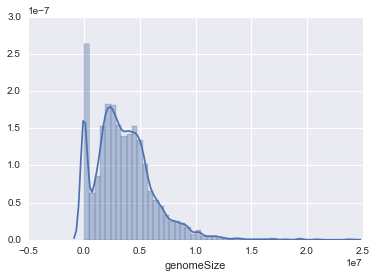

In [87]:
sns.distplot(df.genomeSize)

### NOTE
What follows here is a lot of manipulation of the data frame to get all the data going in the right direction.

In [173]:
df_taxa_reads = df.pivot_table(index='sample_id', columns='name', values='numReads')

In [174]:
df_taxa_genomesize = df.pivot_table(index='sample_id', columns='name', values='genomeSize')

In [176]:
df_taxa_reads.reset_index(level=0, inplace=True)

In [177]:
df_taxa_reads = df_taxa_reads.fillna(0)

In [178]:
df_taxa_reads.head(3)

name,sample_id,'Deinococcus soli' Cha et al. 2014,Acaryochloris marina,Acetobacter,Acetobacter pasteurianus,Acetobacter senegalensis,Acetobacteraceae,Acetobacterium,Acetobacterium woodii,Acetohalobium arabaticum,...,candidate division SR1 bacterium RAAC1_SR1_1,cyanobacterium endosymbiont of Epithemia turgida,endosymbiont of Acanthamoeba sp. UWC8,endosymbiont of Llaveia axin axin,endosymbiont of unidentified scaly snail isolate Monju,gamma proteobacterium HdN1,halophilic archaeon DL31,secondary endosymbiont of Ctenarytaina eucalypti,secondary endosymbiont of Heteropsylla cubana,uncultured Termite group 1 bacterium
0,CC140620_1_centrifuge_report.tsv,15.0,22.0,0.0,19.0,7.0,1.0,0.0,14.0,18.0,...,9.0,13.0,7.0,10.0,13.0,17.0,27.0,3.0,9.0,6.0
1,CC140620_25_centrifuge_report.tsv,8.0,25.0,0.0,14.0,9.0,3.0,0.0,11.0,15.0,...,11.0,24.0,15.0,11.0,20.0,15.0,9.0,7.0,11.0,12.0
2,CC140620_33_centrifuge_report.tsv,2.0,8.0,0.0,10.0,2.0,0.0,0.0,8.0,5.0,...,8.0,9.0,5.0,4.0,3.0,7.0,1.0,2.0,7.0,2.0


In [274]:
df_taxa_t = df_taxa_reads.transpose()

In [275]:
df_taxa_t.reset_index(level=0, inplace=True)

In [276]:
df_taxa_t.columns = df_taxa_t.iloc[0]

In [277]:
df_taxa_clean = df_taxa_t.drop(df.index[[0]])

In [278]:
df_taxa_clean.rename(columns=lambda x: x.replace('_centrifuge_report.tsv', ''), inplace=True)

In [279]:
df_taxa_clean.head(3)

,sample_id,CC140620_1,CC140620_25,CC140620_33,CC140620_37,CC140620_5,CC150624_21,CC150624_25,CC150624_29,CC150626_1
1,'Deinococcus soli' Cha et al. 2014,15,8,2,6,7,34,30,8,34
2,Acaryochloris marina,22,25,8,37,22,14,17,8,13
3,Acetobacter,0,0,0,1,0,0,0,0,0


In [360]:
df_taxa_clean.sum()

0
sample_id      'Deinococcus soli' Cha et al. 2014Acaryochlori...
CC140620_1                                                 56004
CC140620_25                                                56299
CC140620_33                                                29202
CC140620_37                                                70594
CC140620_5                                                 58979
CC150624_21                                               103683
CC150624_25                                                75439
CC150624_29                                                37449
CC150626_1                                                 95417
dtype: object

Centrifuge dumps out it's report at the species level with some genus and class stuff. This results in a huge amount of data to visualize. Here we find the top ten hits for each metagenome. 

In [292]:
# Function to return N values from a series
def sorted(s, num):
    tmp = s.sort_values(ascending=False)[:num]
    tmp.index = range(num)
    return tmp

In [346]:
df_top_10_taxa = df_taxa_clean.apply(lambda x: sorted(x, 10))

In [347]:
df_top_10_taxa

,sample_id,CC140620_1,CC140620_25,CC140620_33,CC140620_37,CC140620_5,CC150624_21,CC150624_25,CC150624_29,CC150626_1
0,uncultured Termite group 1 bacterium,1316.0,1122.0,1075.0,1415.0,4464.0,7893.0,1007.0,1039.0,1012.0
1,secondary endosymbiont of Heteropsylla cubana,1179.0,809.0,706.0,847.0,1167.0,1012.0,359.0,972.0,872.0
2,secondary endosymbiont of Ctenarytaina eucalypti,1030.0,566.0,586.0,837.0,1001.0,872.0,357.0,827.0,799.0
3,halophilic archaeon DL31,957.0,544.0,382.0,822.0,824.0,695.0,337.0,379.0,695.0
4,gamma proteobacterium HdN1,588.0,481.0,379.0,773.0,734.0,582.0,326.0,351.0,582.0
5,endosymbiont of unidentified scaly snail isola...,574.0,475.0,352.0,712.0,588.0,573.0,315.0,351.0,573.0
6,endosymbiont of Llaveia axin axin,554.0,439.0,289.0,695.0,476.0,570.0,312.0,329.0,567.0
7,endosymbiont of Acanthamoeba sp. UWC8,551.0,437.0,259.0,600.0,462.0,564.0,311.0,208.0,564.0
8,cyanobacterium endosymbiont of Epithemia turgida,547.0,434.0,245.0,490.0,430.0,508.0,310.0,207.0,508.0
9,candidate division SR1 bacterium RAAC1_SR1_1,496.0,429.0,236.0,450.0,414.0,492.0,307.0,168.0,492.0


### NOTE
This section is being used to plot a bar chart of relative abundance of each taxa in the metagenomes. DO NOT USE FOR DOWNSTREAM ANALYSIS.

In [348]:
indexed_df = df_top_10_taxa.set_index(['sample_id'])

In [349]:
indexed_df.head(5)

,CC140620_1,CC140620_25,CC140620_33,CC140620_37,CC140620_5,CC150624_21,CC150624_25,CC150624_29,CC150626_1
sample_id,,,,,,,,,
uncultured Termite group 1 bacterium,1316.0,1122.0,1075.0,1415.0,4464.0,7893.0,1007.0,1039.0,1012.0
secondary endosymbiont of Heteropsylla cubana,1179.0,809.0,706.0,847.0,1167.0,1012.0,359.0,972.0,872.0
secondary endosymbiont of Ctenarytaina eucalypti,1030.0,566.0,586.0,837.0,1001.0,872.0,357.0,827.0,799.0
halophilic archaeon DL31,957.0,544.0,382.0,822.0,824.0,695.0,337.0,379.0,695.0
gamma proteobacterium HdN1,588.0,481.0,379.0,773.0,734.0,582.0,326.0,351.0,582.0


In [350]:
df_top_rel = indexed_df/indexed_df.sum(numeric_only=True)

In [352]:
#df_top_rel.plot(kind='bar',stacked=True)

In [353]:
T = df_top_rel.transpose()

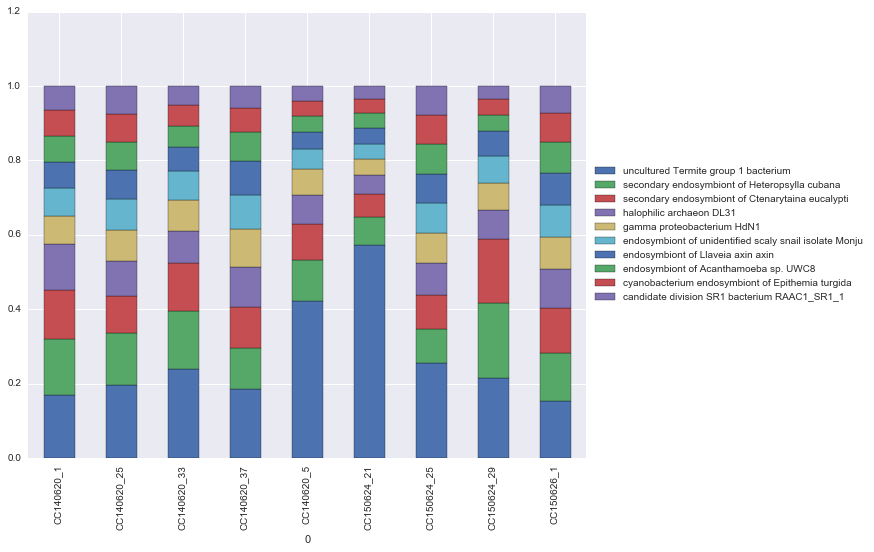

In [367]:
p1 = T.plot(kind='bar',stacked=True)
p1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
p1.figure.set_size_inches(10,8)
savefig('CAVE_centrifuge_species_taxa_top_ten.pdf',bbox_inches='tight')

#### 10/5/2016
There isn't has much variation in the relative abundance of the top ten bacterial taxa. The exception is uncultured Termite group 1 bacterium. I am guessing this is related to parasite load on the bats? Also worth noting:
Total bacteria reads annotated with the compressed centrifuge index:
CC140620_1 -                                               56004

CC140620_25 -                                               56299

CC140620_33 -                                               29202

CC140620_37 -                                               70594

CC140620_5 -                                                58979

CC150624_21 -                                              103683

CC150624_25 -                                               75439

CC150624_29 -                                               37449

CC150626_1 -                                                95417



This is a x5 to x10 more reads than minikraken.

In [368]:
df_taxa_genomesize.head(5)

name,'Deinococcus soli' Cha et al. 2014,Acaryochloris marina,Acetobacter,Acetobacter pasteurianus,Acetobacter senegalensis,Acetobacteraceae,Acetobacterium,Acetobacterium woodii,Acetohalobium arabaticum,Acholeplasma,...,candidate division SR1 bacterium RAAC1_SR1_1,cyanobacterium endosymbiont of Epithemia turgida,endosymbiont of Acanthamoeba sp. UWC8,endosymbiont of Llaveia axin axin,endosymbiont of unidentified scaly snail isolate Monju,gamma proteobacterium HdN1,halophilic archaeon DL31,secondary endosymbiont of Ctenarytaina eucalypti,secondary endosymbiont of Heteropsylla cubana,uncultured Termite group 1 bacterium
sample_id,,,,,,,,,,,,,,,,,,,,,
CC140620_1_centrifuge_report.tsv,3236984.0,8361599.0,NaN,3250449.0,3969909.0,0.0,NaN,4044777.0,2469596.0,NaN,...,1177760.0,2794318.0,1615277.0,309299.0,2597759.0,4587455.0,3643158.0,1441139.0,1121596.0,1148570.0
CC140620_25_centrifuge_report.tsv,3236984.0,8361599.0,NaN,3250449.0,3969909.0,0.0,NaN,4044777.0,2469596.0,NaN,...,1177760.0,2794318.0,1615277.0,309299.0,2597759.0,4587455.0,3643158.0,1441139.0,1121596.0,1148570.0
CC140620_33_centrifuge_report.tsv,3236984.0,8361599.0,NaN,3250449.0,3969909.0,NaN,NaN,4044777.0,2469596.0,NaN,...,1177760.0,2794318.0,1615277.0,309299.0,2597759.0,4587455.0,3643158.0,1441139.0,1121596.0,1148570.0
CC140620_37_centrifuge_report.tsv,3236984.0,8361599.0,0.0,3250449.0,3969909.0,NaN,0.0,4044777.0,2469596.0,0.0,...,1177760.0,2794318.0,1615277.0,309299.0,2597759.0,4587455.0,3643158.0,1441139.0,1121596.0,1148570.0
CC140620_5_centrifuge_report.tsv,3236984.0,8361599.0,NaN,3250449.0,3969909.0,0.0,NaN,4044777.0,2469596.0,0.0,...,1177760.0,2794318.0,1615277.0,309299.0,2597759.0,4587455.0,3643158.0,1441139.0,1121596.0,1148570.0


In [385]:
df_size_t = df_taxa_genomesize.transpose()

In [386]:
df_size_t.head(5)

sample_id,CC140620_1_centrifuge_report.tsv,CC140620_25_centrifuge_report.tsv,CC140620_33_centrifuge_report.tsv,CC140620_37_centrifuge_report.tsv,CC140620_5_centrifuge_report.tsv,CC150624_21_centrifuge_report.tsv,CC150624_25_centrifuge_report.tsv,CC150624_29_centrifuge_report.tsv,CC150626_1_centrifuge_report.tsv
name,,,,,,,,,
'Deinococcus soli' Cha et al. 2014,3236984.0,3236984.0,3236984.0,3236984.0,3236984.0,3236984.0,3236984.0,3236984.0,3236984.0
Acaryochloris marina,8361599.0,8361599.0,8361599.0,8361599.0,8361599.0,8361599.0,8361599.0,8361599.0,8361599.0
Acetobacter,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Acetobacter pasteurianus,3250449.0,3250449.0,3250449.0,3250449.0,3250449.0,3250449.0,3250449.0,3250449.0,3250449.0
Acetobacter senegalensis,3969909.0,3969909.0,3969909.0,3969909.0,3969909.0,3969909.0,3969909.0,3969909.0,3969909.0


In [390]:
df_size_t.rename(columns=lambda x: x.replace('_centrifuge_report.tsv', ''), inplace=True)

In [395]:
df_size_t = df_size_t.dropna()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


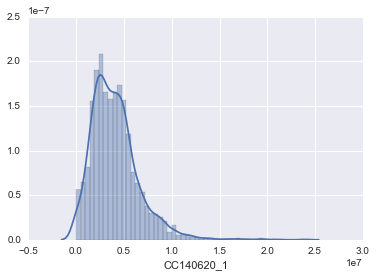

In [397]:
sns.distplot(df_size_t.CC140620_1)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


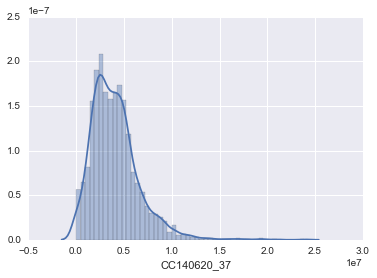

In [400]:
sns.distplot(df_size_t.CC140620_37)